In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommercedata/ecomm.data.csv


This dataset is generated using random functions for practice purposes only and does not represent any real company. The dataset may contain anomalies and should be used solely for practice.

Questions to answer from the dataset :

What are the top-selling products based on the quantity sold, and what is the corresponding revenue generated by each of these products?

How do product promotions impact sales? Are products with promotions selling better than non-promoted products?

How do customer ratings vary across different product categories? Are there any categories with higher average ratings than others?

What is the distribution of customer ages and genders in the dataset?

Are there any geographical patterns in product sales? Which locations (countries) have the highest and lowest sales volumes.?

What is the overall revenue generated by ShopBasket during the given period.

In [2]:
dataset = pd.read_csv(r"/kaggle/input/ecommercedata/ecomm.data.csv")
dataset.head()

,ProductID,ProductName,Category,Price,QuantitySold,Promotion,Discount,Rating,CustomerAge,CustomerGender,CustomerLocation,PurchaseDate
0,1001,Badminton Set,Electronics,50.0,77,Yes,32,4.0,64,Female,Australia,2022-01-01
1,1002,Curtains,Electronics,196.0,38,Yes,45,NaN,24,Male,China,2022-01-02
2,1003,Hoodie,Beauty,336.0,8,No,4,NaN,36,Male,India,2022-01-03
3,1004,Mascara,Beauty,191.0,78,No,42,1.0,39,Male,Australia,2022-01-04
4,1005,Gaming Console,Sports,102.0,74,No,47,NaN,52,Female,Russia,2022-01-05


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductID         1000 non-null   int64  
 1   ProductName       1000 non-null   object 
 2   Category          1000 non-null   object 
 3   Price             980 non-null    float64
 4   QuantitySold      1000 non-null   int64  
 5   Promotion         1000 non-null   object 
 6   Discount          1000 non-null   int64  
 7   Rating            867 non-null    float64
 8   CustomerAge       1000 non-null   int64  
 9   CustomerGender    1000 non-null   object 
 10  CustomerLocation  1000 non-null   object 
 11  PurchaseDate      1000 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 93.9+ KB


In [4]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ProductID,1000.0,1500.500000,288.819436,1001.0,1250.75,1500.5,1750.25,2000.0
Price,980.0,272.608163,129.733952,50.0,165.00,269.0,385.25,499.0
QuantitySold,1000.0,43.293000,31.107183,-10.0,17.00,41.0,70.00,99.0
Discount,1000.0,24.966000,14.346521,0.0,13.00,25.0,37.25,49.0
Rating,867.0,3.377163,1.296499,1.0,3.00,4.0,4.00,5.0
CustomerAge,1000.0,40.347000,13.269237,18.0,29.00,40.0,52.00,64.0


In [5]:
# Data Cleaning
dataset.isnull().sum()

ProductID             0
ProductName           0
Category              0
Price                20
QuantitySold          0
Promotion             0
Discount              0
Rating              133
CustomerAge           0
CustomerGender        0
CustomerLocation      0
PurchaseDate          0
dtype: int64

In [6]:
mean_rating = dataset["Rating"].mean()
dataset["Rating"] = dataset["Rating"].fillna(mean_rating)
dataset.head()

,ProductID,ProductName,Category,Price,QuantitySold,Promotion,Discount,Rating,CustomerAge,CustomerGender,CustomerLocation,PurchaseDate
0,1001,Badminton Set,Electronics,50.0,77,Yes,32,4.000000,64,Female,Australia,2022-01-01
1,1002,Curtains,Electronics,196.0,38,Yes,45,3.377163,24,Male,China,2022-01-02
2,1003,Hoodie,Beauty,336.0,8,No,4,3.377163,36,Male,India,2022-01-03
3,1004,Mascara,Beauty,191.0,78,No,42,1.000000,39,Male,Australia,2022-01-04
4,1005,Gaming Console,Sports,102.0,74,No,47,3.377163,52,Female,Russia,2022-01-05


In [7]:
mean_price = dataset["Price"].mean()
dataset["Price"] = dataset["Price"].fillna(mean_price)
dataset.isnull().sum()

ProductID           0
ProductName         0
Category            0
Price               0
QuantitySold        0
Promotion           0
Discount            0
Rating              0
CustomerAge         0
CustomerGender      0
CustomerLocation    0
PurchaseDate        0
dtype: int64

In [8]:
#Creating Revenue column
dataset["Revenue"] = dataset["QuantitySold"]*dataset["Price"]
dataset

,ProductID,ProductName,Category,Price,QuantitySold,Promotion,Discount,Rating,CustomerAge,CustomerGender,CustomerLocation,PurchaseDate,Revenue
0,1001,Badminton Set,Electronics,50.0,77,Yes,32,4.000000,64,Female,Australia,2022-01-01,3850.0
1,1002,Curtains,Electronics,196.0,38,Yes,45,3.377163,24,Male,China,2022-01-02,7448.0
2,1003,Hoodie,Beauty,336.0,8,No,4,3.377163,36,Male,India,2022-01-03,2688.0
3,1004,Mascara,Beauty,191.0,78,No,42,1.000000,39,Male,Australia,2022-01-04,14898.0
4,1005,Gaming Console,Sports,102.0,74,No,47,3.377163,52,Female,Russia,2022-01-05,7548.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,Coffee Maker,Sports,118.0,17,Yes,34,3.377163,36,Female,Brazil,2024-09-22,2006.0
996,1997,Exercise Bike,Home & Garden,180.0,0,Yes,21,1.000000,38,Female,France,2024-09-23,0.0
997,1998,Blush,Electronics,136.0,54,No,39,3.377163,41,Male,Spain,2024-09-24,7344.0
998,1999,Camera,Sports,267.0,96,No,22,3.377163,55,Female,France,2024-09-25,25632.0


In [9]:
df = dataset[dataset["QuantitySold"] >= 1]
print(df)
# Data is cleaned now and we will proceed to EDA

     ProductID     ProductName     Category  Price  QuantitySold Promotion  \
0         1001   Badminton Set  Electronics   50.0            77       Yes   
1         1002        Curtains  Electronics  196.0            38       Yes   
2         1003          Hoodie       Beauty  336.0             8        No   
3         1004         Mascara       Beauty  191.0            78        No   
4         1005  Gaming Console       Sports  102.0            74        No   
..         ...             ...          ...    ...           ...       ...   
994       1995          Camera  Electronics  131.0            18       Yes   
995       1996    Coffee Maker       Sports  118.0            17       Yes   
997       1998           Blush  Electronics  136.0            54        No   
998       1999          Camera       Sports  267.0            96        No   
999       2000   Tennis Racket  Electronics  470.0             8       Yes   

     Discount    Rating  CustomerAge CustomerGender CustomerLoc

In [10]:
product_sales = df.groupby("ProductName")["QuantitySold"].sum()

product_revenues = df.groupby("ProductName")["Revenue"].sum()

pd.options.display.float_format = '{:.2f}'.format

top_selling_products = pd.concat([product_sales, product_revenues], axis=1)
top_selling_products.columns = ["Total Quantity Sold", "Total Revenue"]
top_selling_products = top_selling_products.sort_values(by="Total Quantity Sold", ascending=False)
print(top_selling_products.head(10))

              Total Quantity Sold  Total Revenue
ProductName                                     
Basketball                   1402      375534.34
Air Purifier                 1319      407152.00
Yoga Mat                     1201      257433.00
Skirt                        1200      352583.36
Football                     1177      263216.00
Dumbbells                    1161      305186.61
Coffee Maker                 1158      302398.00
Jeans                        1138      295865.00
Tablet                       1099      315325.00
Microwave                    1091      265086.00


In [11]:
category_sales = df.groupby("Category")["QuantitySold"].sum()

category_revenues = df.groupby("Category")["Revenue"].sum()

pd.options.display.float_format = '{:.2f}'.format

top_selling_category = pd.concat([category_sales, category_revenues], axis=1)
top_selling_category.columns = ["Total Quantity Sold", "Total Revenue"]
top_selling_category = top_selling_category.sort_values(by="Total Revenue", ascending=False)
print(top_selling_category)

               Total Quantity Sold  Total Revenue
Category                                         
Clothing                      8786     2465227.76
Sports                        8891     2419136.73
Beauty                        9057     2399370.71
Electronics                   9060     2354404.20
Home & Garden                 7935     2175465.57


In [12]:
overall_revenue = df['Revenue'].sum()

print("Overall Revenue: ", overall_revenue)

Overall Revenue:  11813604.979591837


In [13]:
average_category_price = df.groupby("Category")["Price"].mean()
print(average_category_price)

Category
Beauty          271.58
Clothing        282.59
Electronics     262.78
Home & Garden   262.62
Sports          275.76
Name: Price, dtype: float64


In [14]:
promoted_revenue = df[df["Promotion"] == "Yes"]["QuantitySold"].sum()
non_promoted_revenue = df[df["Promotion"] == "No"]["QuantitySold"].sum()
print("Promoted Product = ",promoted_revenue)
print("Non-Promoted Product = ",non_promoted_revenue)

impact_of_promotions = promoted_revenue - non_promoted_revenue
print("Impact of Promotions on Sales:", impact_of_promotions)

#promoted products did sold more than non-promoted products

Promoted Product =  22687
Non-Promoted Product =  21042
Impact of Promotions on Sales: 1645


In [15]:
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"])
df["Month"] = df["PurchaseDate"].dt.month
monthly_sales = df.groupby("Month")["QuantitySold"].sum()
monthly_sales.sort_values(ascending = False)

/tmp/ipykernel_20/1662202375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"])
/tmp/ipykernel_20/1662202375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["PurchaseDate"].dt.month


Month
3     4225
1     4150
7     4073
8     3995
2     3942
4     3870
5     3788
6     3780
9     3622
12    2881
10    2748
11    2655
Name: QuantitySold, dtype: int64

In [16]:
average_rating = df.groupby("Category")["Rating"].mean()
print(average_rating)

Category
Beauty          3.45
Clothing        3.28
Electronics     3.36
Home & Garden   3.38
Sports          3.35
Name: Rating, dtype: float64


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/322342110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AgeGroup"] = pd.cut(df["CustomerAge"], bins=age_bins)


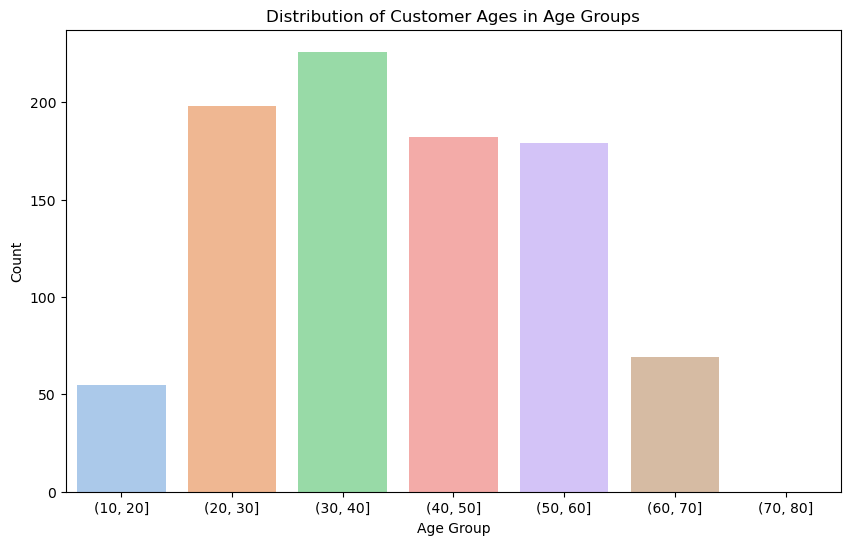

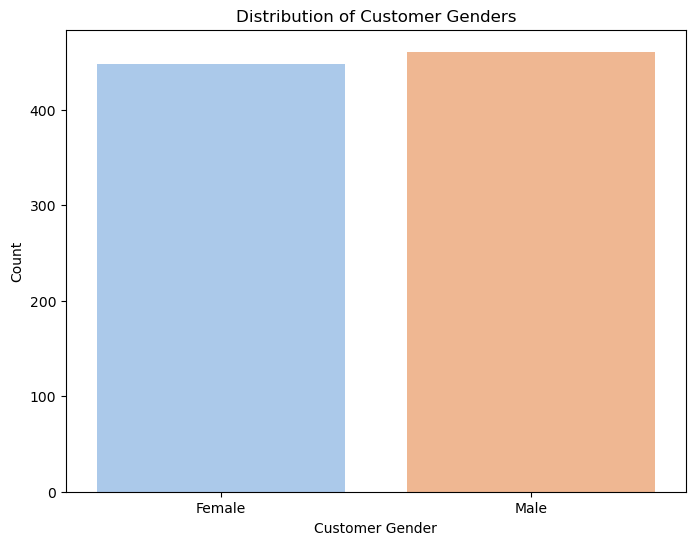

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

age_bins = [10, 20,30, 40, 50, 60, 70, 80]

df["AgeGroup"] = pd.cut(df["CustomerAge"], bins=age_bins)

plt.figure(figsize=(10, 6))
sns.countplot(x="AgeGroup", data=df, palette="pastel")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Customer Ages in Age Groups")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x="CustomerGender", data=df, palette="pastel")
plt.xlabel("Customer Gender")
plt.ylabel("Count")
plt.title("Distribution of Customer Genders")
plt.show()



In [18]:
top_selling_locations = df.groupby("CustomerLocation").agg({"QuantitySold": "sum", "Revenue": "sum"}).sort_values(by="QuantitySold", ascending=False)
print(top_selling_locations.head(10))


                  QuantitySold    Revenue
CustomerLocation                         
Japan                     3710  991655.99
South Africa              3607 1025230.30
Russia                    3336  868358.00
Germany                   3267  868240.45
Spain                     3198  919020.22
Australia                 3115  739612.09
France                    2912  737926.00
United States             2889  866092.34
Brazil                    2711  728104.64
Italy                     2648  668289.84


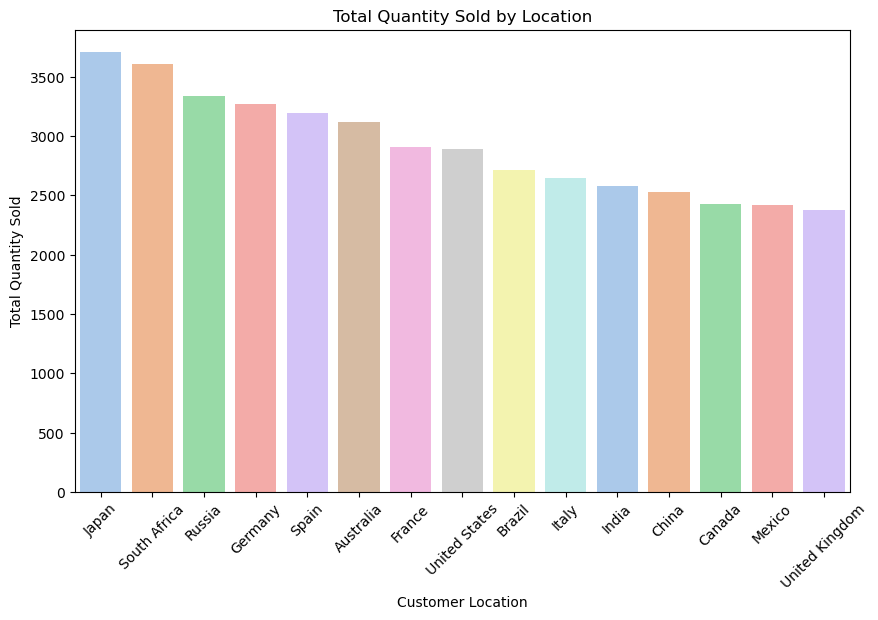

In [19]:
sales_by_location = df.groupby("CustomerLocation")["QuantitySold"].sum().reset_index()

sales_by_location = sales_by_location.sort_values(by="QuantitySold", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="CustomerLocation", y="QuantitySold", data=sales_by_location, palette="pastel")
plt.xlabel("Customer Location")
plt.ylabel("Total Quantity Sold")
plt.title("Total Quantity Sold by Location")
plt.xticks(rotation=45)
plt.show()


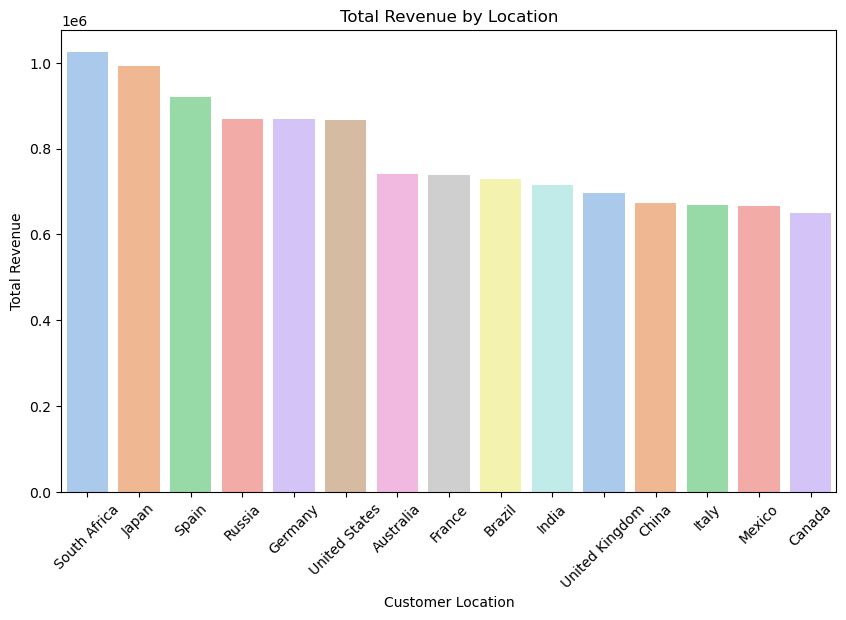

In [20]:
revenue_by_location = df.groupby("CustomerLocation")["Revenue"].sum().reset_index()

revenue_by_location = revenue_by_location.sort_values(by="Revenue", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="CustomerLocation", y="Revenue", data=revenue_by_location, palette="pastel")
plt.xlabel("Customer Location")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Location")
plt.xticks(rotation=45)
plt.show()

In [21]:
correlation = df["Price"].corr(df["Rating"])

print("Correlation between Product Prices and Customer Ratings:", correlation)

Correlation between Product Prices and Customer Ratings: -0.03117111223825857


**Findings from the Data**

1. **Top Selling Products:**
   - The top-selling product is "Basketball" with 1402 units sold, generating revenue of 375K Dollars.
   - "Air Purifier" and "Yoga Mat" are the next best-selling products with 1319 and 1201 units sold respectively.

2. **Top Revenue Generating Category:**
   - The "Clothing" category generates the highest revenue, amounting to 2.4M Dollars.

3. **Overall Revenue:**
   - The company's overall revenue is 11.8M Dollars.

4. **Impact of Promotions on Sales:**
   - Promoted products sold 1645 units more than non-promoted products.

5. **Sales Trends:**
   - The highest quantity of products was sold in March (4225 units), followed by January(4150) and July(4073).

6. **Average Category Rating:**
   - All categories have an average rating in the same range 3.
   - Beauty: 3.45
   - Clothing: 3.28
   - Electronics: 3.36
   - Home & Garden: 3.38
   - Sports: 3.35

7. **Customer Demographics:**
   - The majority of shoppers fall into the age group of 30-40, followed by 20-30.
   - Both males and females are active shoppers, with a higher number of male customers.

8. **Product Average Price by Category(in Dollars):**
   - Clothing: 282.59
   - Sports: 275.76
   - Beauty: 271.58
   - Electronics: 262.78
   - Home & Garden: 262.62

9. **Geographical Patterns:**
   - Japan has the highest quantity of products sold (3710 units), generating revenue of 991K Dollars, indicating a strong market demand.
   - South Africa generates the highest revenue, amounting to 1.02 M Dollars, highlighting its significance as a profitable market.
   - Other top-selling locations include Russia, Germany, Spain, and Australia.
   - Mexico has the lowest quantity of products sold and is the lowest revenue-generating country.

10. **Correlation between Product Prices and Customer Ratings:**
    - A weak negative correlation (-0.03) between product prices and customer ratings suggests that higher-priced products do not necessarily receive better ratings.